In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_df = pd.read_csv("../data/raw/heart_cleveland_upload.csv")

In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


#### Check with null-value elements in dataframe:

In [5]:
raw_df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

There aren't any null-values in columns, so, we don't need to use fillna.
#### Let's see distibution of target column with using pie:

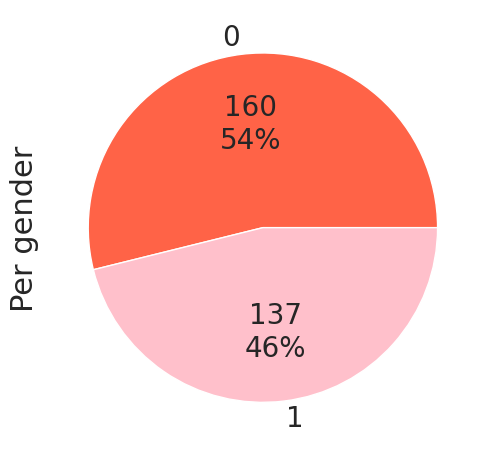

In [8]:
# special func
def label_function(val):
    return f'{val / 100 * len(raw_df):.0f}\n{val:.0f}%'

fig, ax = plt.subplots(figsize=(5, 5))

raw_df.groupby('condition').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                  colors=['tomato', 'pink'], ax=ax)

ax.set_ylabel('Per gender', size=22)
plt.tight_layout()
plt.show()

The distribution of 'condition' is near to uniform.
#### Let's see correlation matrix of variables and target:

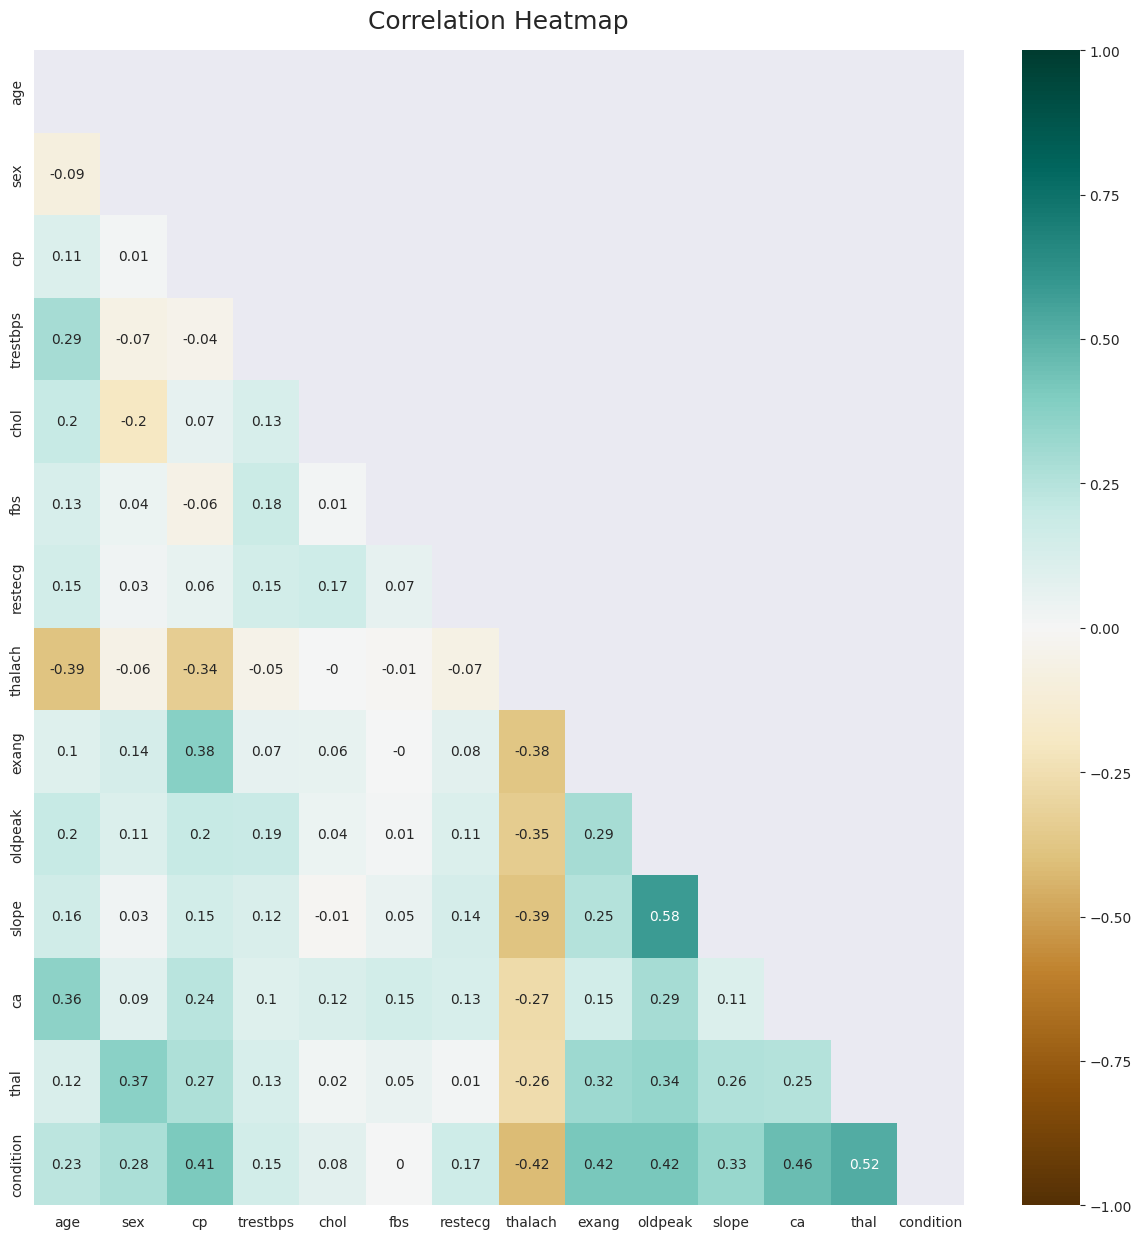

In [12]:
plt.figure(figsize=(15, 15))

corr = raw_df.corr().round(2)

mask = np.triu(np.ones_like(corr.round(2), dtype=bool))
heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

![alternatvie text](https://miro.medium.com/max/932/1*Qz_gwy4ZaSZuOpl3IyO2HA.png)

We have only one moderate positive correlation with 'condition' - column 'thal'. It means that person with reversable defect have more chance to have disease. After that between variables we have one more moderate positive correlation - between 'oldpeak' and 'slope'. ST depression induced by exercise relative to rest and the slope of the peak exercise ST segment are binded by scapulothoracic.
#### Analytics of dependencies categorical variables and target:


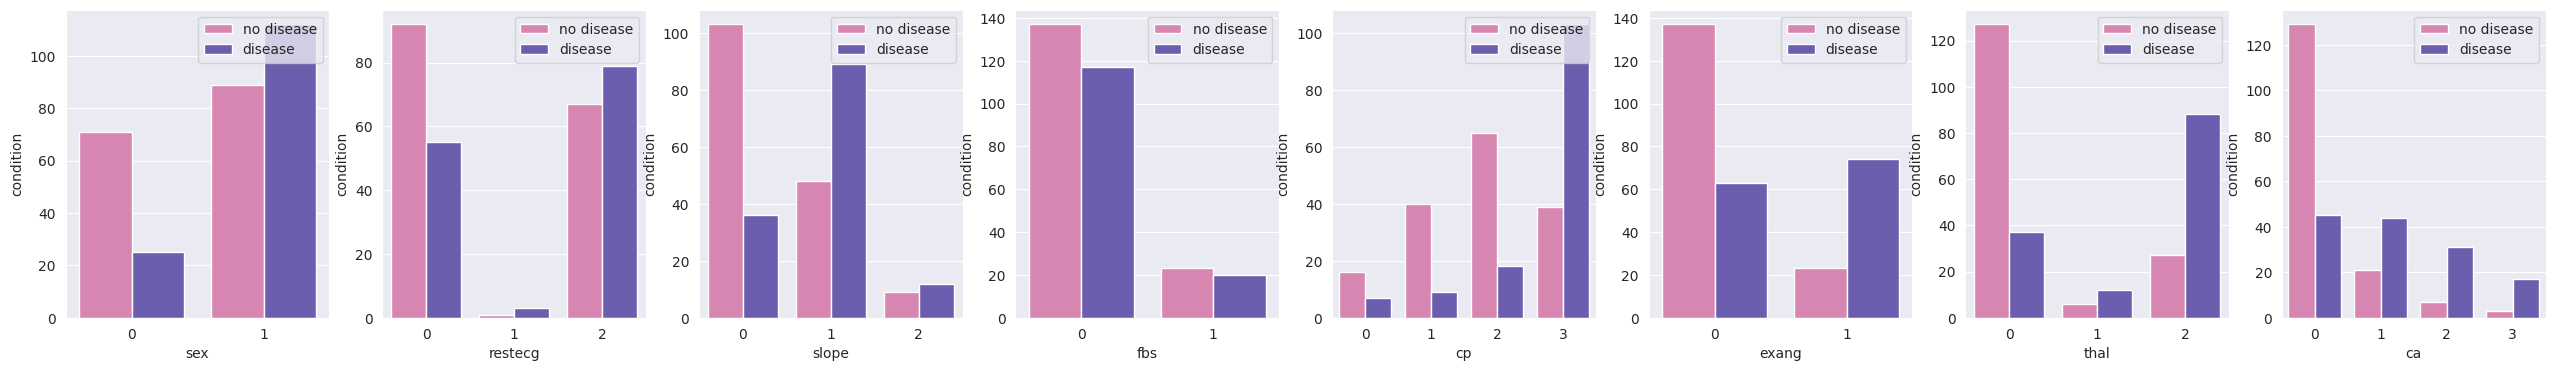

In [20]:
# Categorical Features: sex,restecg,slope,fbs,cp,exang,thal,ca
cat_columns = ['sex','restecg','slope','fbs','cp','exang','thal','ca']

fig, ax = plt.subplots(1, len(cat_columns), figsize=(4 * len(cat_columns),4))

for i in range(len(cat_columns)):
    sns.countplot(x=cat_columns[i], hue='condition',data=raw_df, palette=['#E379B2','#6351BB'], ax=ax[i])
    ax[i].legend(['no disease', 'disease'], loc='upper right')
    ax[i].set_xlabel(cat_columns[i])
    ax[i].set_ylabel('condition')

plt.show()

1) Sex: female have more change to avoid disease. Male have equal probability fot having or not disease;
2) Restecg: having ST-T wave abnormality have very low probability. But normal resting electrocardiographic results have more change to haven't got disease;
3) Slope: downsloping in slope of the peak exercise ST segment is rare. Upsloping is closer to haven't got the disease, but flat is closer to disease;
4) Fbs: uniform distribution, fasting blood sugar more than 120 mg/dl is rare;
5) Cp: for chest pain type in (typical angina, atypical angina, non-anginal pain) desease have less chance. For asymptomatic this chance is high;
6) Exang: if exercise induced angina disease have high chance to start;
7) Thal: fixed defect is low-probability. Normal - more chance of disease, reversable defect - more chance of avoiding disease;
8) Ca: for number of major vessels equal to 0 patient can avoid disease, for ca greater than 0 chance for having disease is high.
#### Analytics of numeric variables:

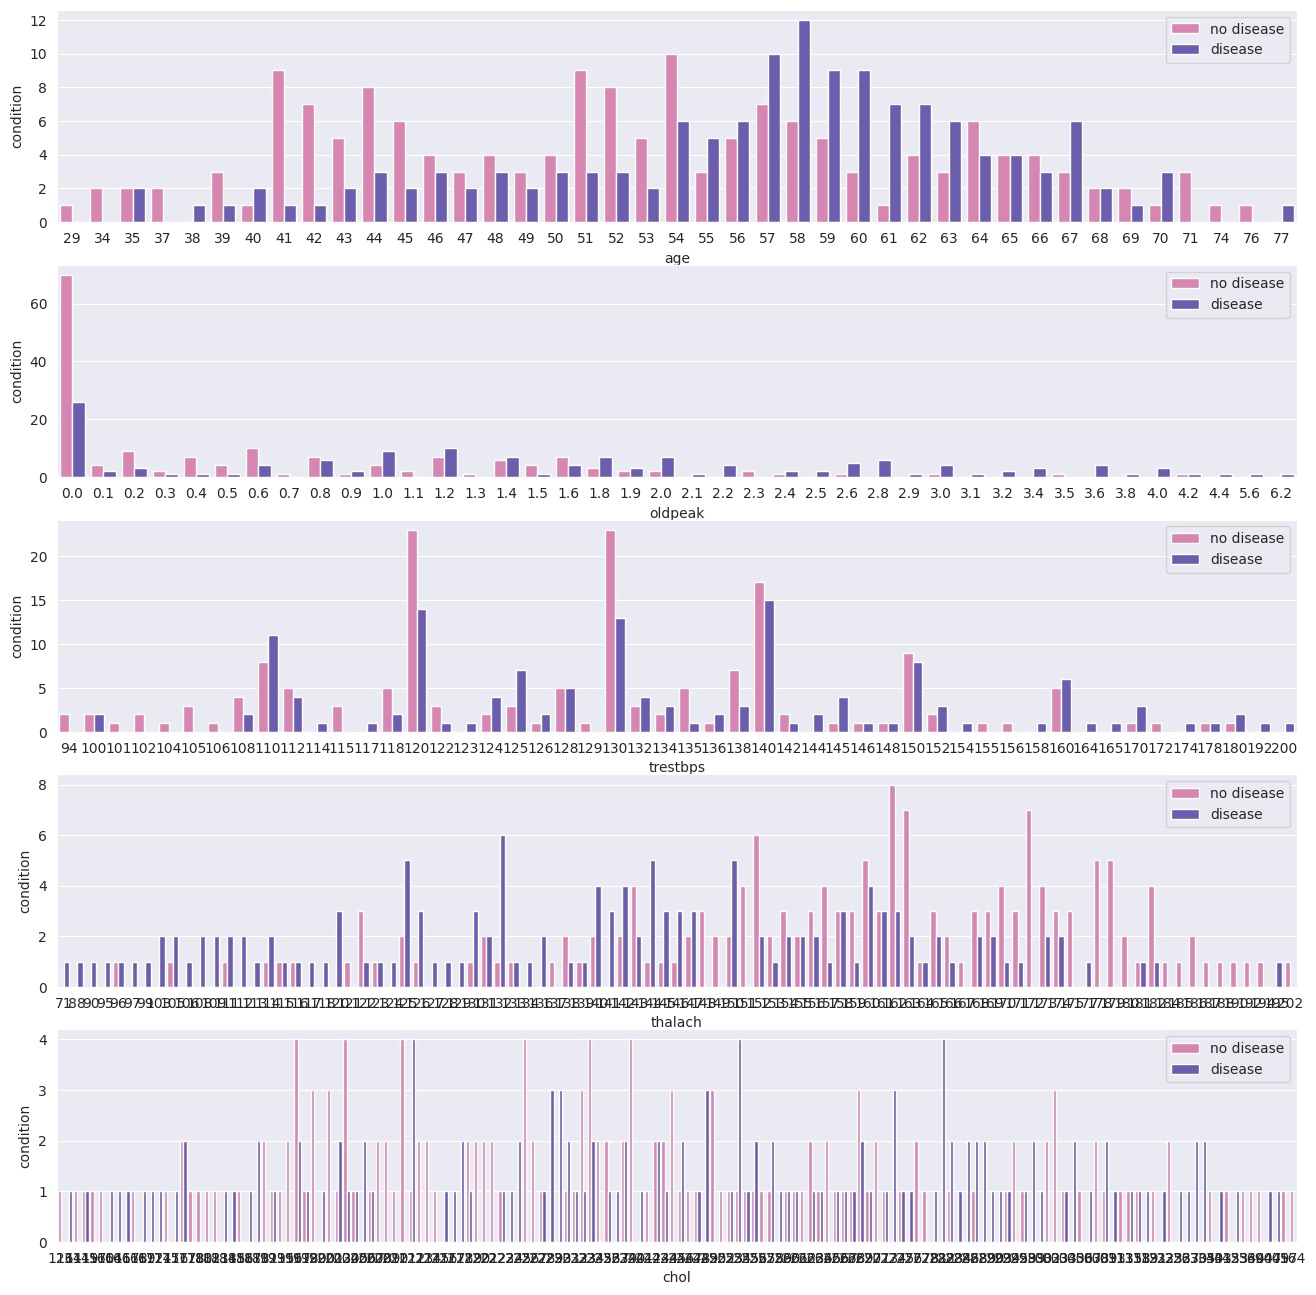

In [22]:
# Numerical Features: age,oldpeak,trestbps,thalach,chol
num_columns = ['age', 'oldpeak', 'trestbps', 'thalach', 'chol']

fig, ax = plt.subplots(len(num_columns), 1, figsize=(16,16))

for i in range(len(num_columns)):
    sns.countplot(x=num_columns[i], hue='condition',data=raw_df, palette=['#E379B2','#6351BB'], ax=ax[i])
    ax[i].legend(['no disease', 'disease'], loc='upper right')
    ax[i].set_xlabel(num_columns[i])
    ax[i].set_ylabel('condition')

plt.show()

1) Older people have more chance to have problems with disease;
2) ST depression induced by exercise relative to rest have low results for both target variants. But, for oldpeak < 0.9 people have more chance to avoid disease;
3) Equal distribution for disease/no disease;
4) People with high maximum heart rate achieved have better chance to avoid disease;
5) For chol we have close to uniform distribution.